In [1]:
# cd CrisisMMD_Dataset

In [2]:
%reload_ext autoreload # ensuring that any edits to libraries you make are reloaded here automatically
%autoreload 2
%matplotlib inline #to ensuere charts or images displayed are shown in this notebook

In [3]:
# importing necessary packages
from fastai import *
from fastai.vision import *
from fastai.callbacks import *
from Precision_Module import Precision1

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import aidrtokenize
from sklearn.metrics import classification_report

In [5]:
path = Path('/notebooks/CrisisMMD_Dataset')
# path.ls()

In [6]:
path_img = path/'data_image'

In [7]:
def clean_ascii(text):
    # function to remove non-ASCII chars from data
    return ''.join(i for i in text if ord(i) < 128)

In [8]:
data_info_image_file = 'new_task_informative_text_img_agreed_lab_info_data.tsv'
test_data_info_image_file = 'new_task_informative_text_img_agreed_lab_test_data.tsv' 

In [9]:
# reading the required data from various file and saving it with necessary changes in order to avoid repetition 

if data_info_image_file and test_data_info_image_file in path.ls():
    data_info_image_file = pd.read_csv('new_task_informative_text_img_agreed_lab_info_data.tsv',delimiter='\t',encoding='utf-8')
    test_info_image_file = pd.read_csv('task_informative_text_img_agreed_lab_test_data.tsv',delimiter='\t',encoding='utf-8')
else:
    train_info_image=pd.read_csv('task_informative_text_img_agreed_lab_train.tsv',delimiter='\t',encoding='utf-8')
    test_info_image=pd.read_csv('task_informative_text_img_agreed_lab_test.tsv',delimiter='\t',encoding='utf-8')
    dev_info_image=pd.read_csv('task_informative_text_img_agreed_lab_dev.tsv',delimiter='\t',encoding='utf-8')
    
    train_info_image['tweet_text']=train_info_image['tweet_text'].apply(lambda x:aidrtokenize.tokenize(x))
    dev_info_image['tweet_text']=dev_info_image['tweet_text'].apply(lambda x:aidrtokenize.tokenize(x))
    test_info_image['tweet_text']=test_info_image['tweet_text'].apply(lambda x:aidrtokenize.tokenize(x))
    
    train_info_image['tweet_text'] = train_info_image['tweet_text'].apply(lambda x:clean_ascii(x))
    dev_info_image['tweet_text'] = dev_info_image['tweet_text'].apply(lambda x:clean_ascii(x))
    test_info_image['tweet_text'] = test_info_image['tweet_text'].apply(lambda x:clean_ascii(x))
    
    train_info_image['is_valid'] = False
    dev_info_image['is_valid'] = True
    test_info_image['is_valid'] = False 

    train_info_image['is_test'] = False
    dev_info_image['is_test'] = False
    test_info_image['is_test'] = True
    
    data_info_image = pd.concat([train_info_image,dev_info_image],axis=0).reset_index()
    data_info_image = data_info_image.drop(['index'],axis=1)
    
    test_data_info_image = pd.concat([train_info_image,test_info_image],axis=0).reset_index()
    test_data_info_image = test_data_info_image.drop(['index'],axis=1)
    
    data_info_image.to_csv('new_task_informative_text_img_agreed_lab_info_data.tsv',encoding='utf-8')
    test_data_info_image.to_csv('new_task_informative_text_img_agreed_lab_test_data.tsv',encoding='utf-8')

In [10]:
print(f"shape of data: {data_info_image.shape}\n")
print(data_info_image['is_valid'].value_counts())
print("="*50)
print(f"shape of test data: {test_data_info_image.shape}\n")
print(test_data_info_image['is_test'].value_counts())

shape of data: (11174, 11)

False    9601
True     1573
Name: is_valid, dtype: int64
shape of test data: (11135, 11)

False    9601
True     1534
Name: is_test, dtype: int64


In [11]:
data_info_image.head()

,event_name,tweet_id,image_id,tweet_text,image,label,label_text,label_image,label_text_image,is_valid,is_test
0,california_wildfires,917791291823591425,917791291823591425_0,pls share were capturing wildfire response rec...,data_image/california_wildfires/10_10_2017/917...,informative,informative,informative,Positive,False,False
1,california_wildfires,917793137925459968,917793137925459968_0,california wildfires destroy more than structu...,data_image/california_wildfires/10_10_2017/917...,informative,informative,informative,Positive,False,False
2,california_wildfires,917793137925459968,917793137925459968_1,california wildfires destroy more than structu...,data_image/california_wildfires/10_10_2017/917...,informative,informative,informative,Positive,False,False
3,california_wildfires,917793137925459968,917793137925459968_2,california wildfires destroy more than structu...,data_image/california_wildfires/10_10_2017/917...,informative,informative,informative,Positive,False,False
4,california_wildfires,917815040962695168,917815040962695168_0,photos of california destructive wildfires via,data_image/california_wildfires/10_10_2017/917...,informative,informative,informative,Positive,False,False


In [12]:
test_data_info_image.head()

,event_name,tweet_id,image_id,tweet_text,image,label,label_text,label_image,label_text_image,is_valid,is_test
0,california_wildfires,917791291823591425,917791291823591425_0,pls share were capturing wildfire response rec...,data_image/california_wildfires/10_10_2017/917...,informative,informative,informative,Positive,False,False
1,california_wildfires,917793137925459968,917793137925459968_0,california wildfires destroy more than structu...,data_image/california_wildfires/10_10_2017/917...,informative,informative,informative,Positive,False,False
2,california_wildfires,917793137925459968,917793137925459968_1,california wildfires destroy more than structu...,data_image/california_wildfires/10_10_2017/917...,informative,informative,informative,Positive,False,False
3,california_wildfires,917793137925459968,917793137925459968_2,california wildfires destroy more than structu...,data_image/california_wildfires/10_10_2017/917...,informative,informative,informative,Positive,False,False
4,california_wildfires,917815040962695168,917815040962695168_0,photos of california destructive wildfires via,data_image/california_wildfires/10_10_2017/917...,informative,informative,informative,Positive,False,False


In [13]:
tfms = get_transforms()

In [14]:
#preprocessing and creating image test data for classification
test_data_img = (ImageList.from_df(test_data_info_image,path,cols='image')
        #Where to find the data? -> from test_data_info_image dataframe
        .split_from_df(col='is_test')
        #How to split in train/valid? -> using is_test column of dataframe
        .label_from_df(cols='label_image')
        #How to label? -> use the label_image column of the csv file and split
        .transform(tfms, size=224)
        #Data augmentation? -> use tfms with a size of 224
        .databunch()
        .normalize(imagenet_stats))                          
        #Finally -> use the defaults for conversion to databunch

In [20]:
#preprocessing and creating image data for classification
data_img = (ImageList.from_df(data_info_image,path,cols='image')
        #Where to find the data? -> from data_info_image dataframe
        .split_from_df(col='is_valid')
        #How to split in train/valid? -> using is_valid column of dataframe
        .label_from_df(cols='label_image')
        #How to label? -> use the label_image column of the csv file and split
        .add_test(test_data_img.valid_ds.x)
        .transform(tfms, size=224)
        #Data augmentation? -> use tfms with a size of 224
        .databunch()
        .normalize(imagenet_stats))                          
        #Finally -> use the defaults for conversion to databunch

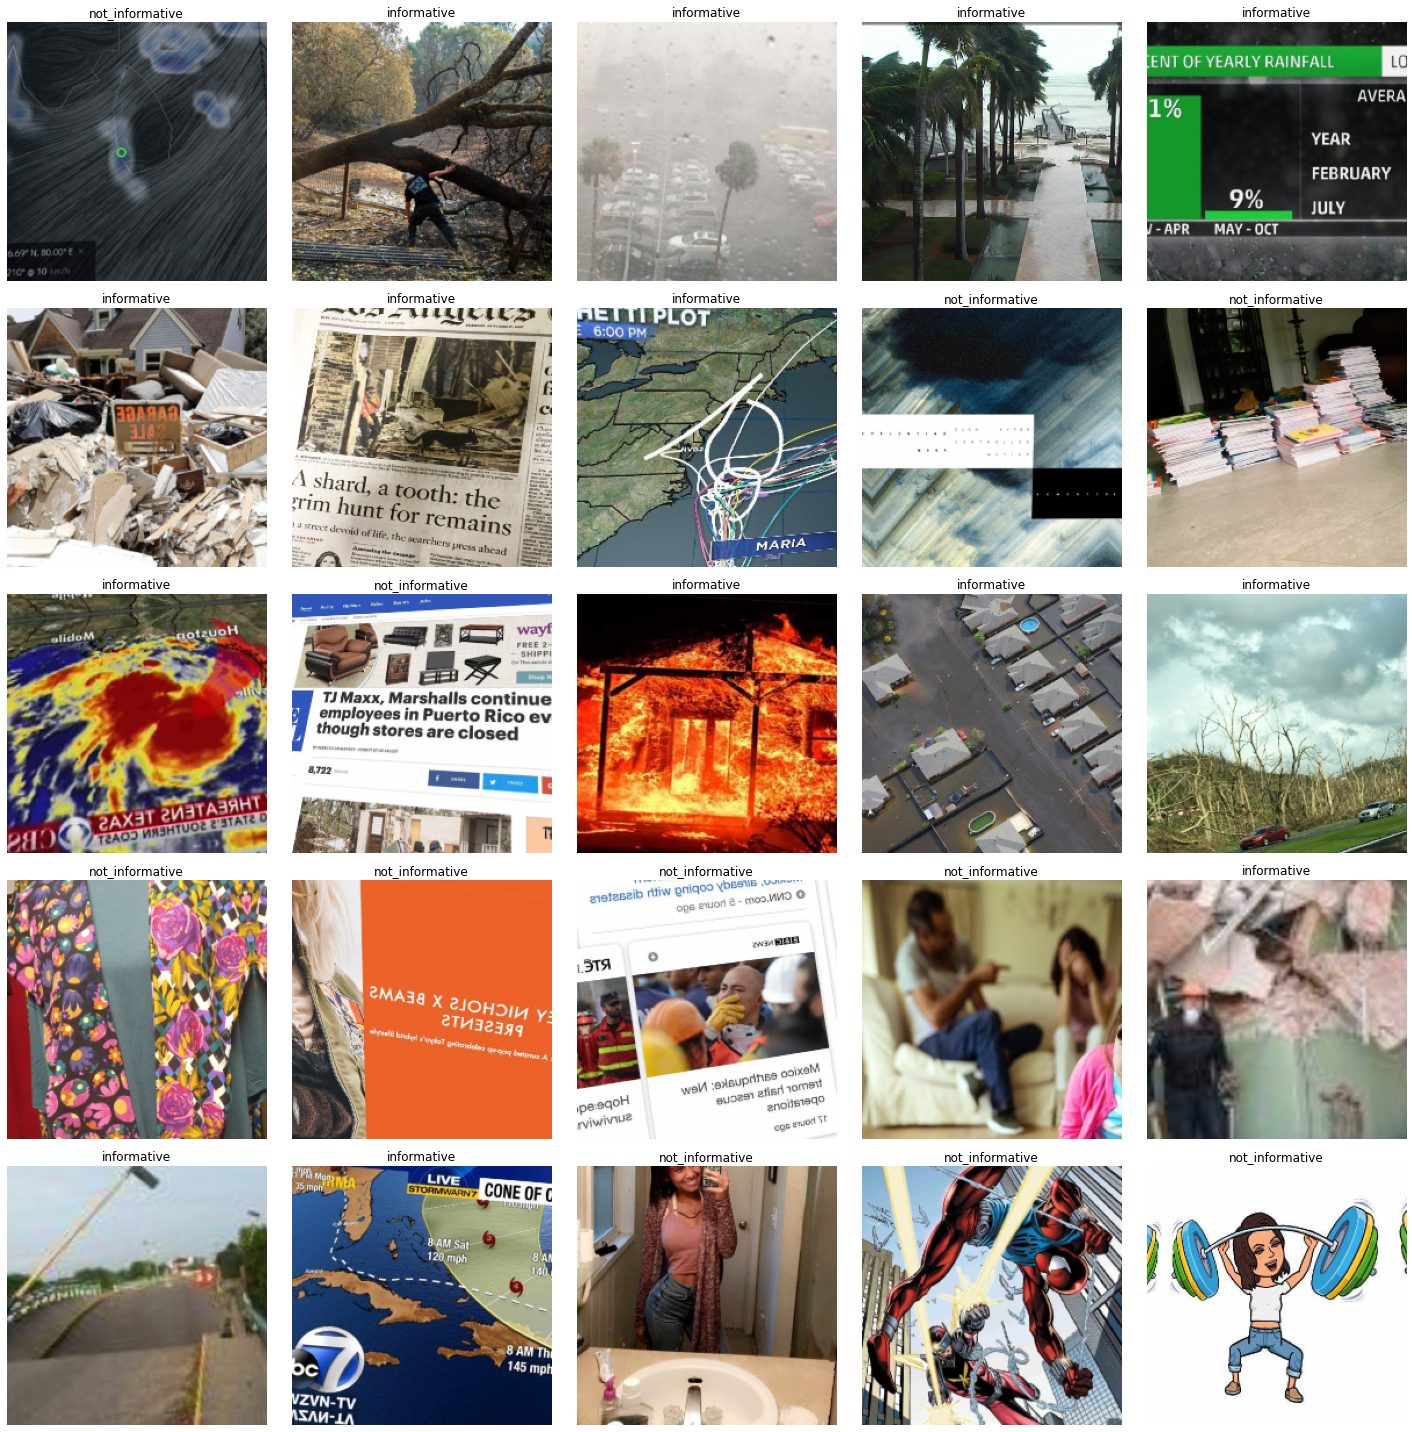

In [21]:
# showing the data with corresponding label
data_img.show_batch()

In [22]:
# importing pretrained Resnet50 model and making learner object consist of data,model,metrics and callbacks for training
arch = models.resnet50
learn_img = cnn_learner(data_img, arch, metrics=[accuracy,Precision(average='macro'),
                Precision(average='weighted'),Recall(average='macro'),Recall(average='weighted'),
               FBeta(average='macro',beta=1.),FBeta(average='weighted',beta=1.)],
            callback_fns=[ShowGraph,partial(EarlyStoppingCallback, monitor='valid_loss', min_delta=0.01, patience=3),
               partial(ReduceLROnPlateauCallback,monitor='valid_loss', mode='auto', patience=0,
                       factor=0.2, min_delta=0, min_lr=0.000001)]            
            )

In [25]:
learn_img.lr_find()

In [26]:
learn_img.recorder.plot()

epoch,train_loss,valid_loss,accuracy,precision,precision,recall,recall,f_beta,f_beta,time
0,0.854814,0.547392,0.795931,0.770633,0.807586,0.789763,0.795931,0.777387,0.799403,01:26
1,0.694493,0.485663,0.804832,0.778795,0.811205,0.791949,0.804832,0.784235,0.807078,01:19
2,0.615593,0.487474,0.813732,0.788546,0.820791,0.803514,0.813732,0.794606,0.816083,01:16


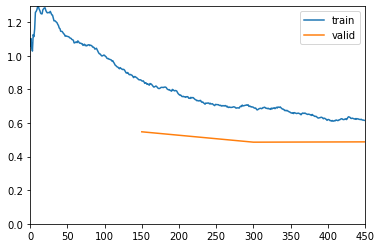

Better model found at epoch 0 with accuracy value: 0.795931339263916.
Better model found at epoch 1 with accuracy value: 0.8048315048217773.
Better model found at epoch 2 with accuracy value: 0.8137317299842834.


In [27]:
# training the model's top layer's keeping other layer's in freezing mode, all the metric shown here, have been
# evaluted on validation set
lr = 0.0001
learn_img.fit_one_cycle(3, slice(lr))

In [28]:
# unfreezing bottom layer's
learn_img.unfreeze()
learn_img.lr_find()
learn_img.recorder.plot()

epoch,train_loss,valid_loss,accuracy,precision,precision,recall,recall,f_beta,f_beta,time
0,0.647387,0.514887,0.810553,0.784966,0.816670,0.798185,0.810553,0.790469,0.812698,01:22
1,0.519545,0.426625,0.832168,0.813962,0.829513,0.798487,0.832168,0.805229,0.830050,01:21
2,0.407174,0.371631,0.820725,0.807892,0.817303,0.772687,0.820725,0.785558,0.815315,01:17
3,0.381181,0.399829,0.823268,0.817365,0.821387,0.768657,0.823268,0.784807,0.815980,01:19
4,0.385416,0.382123,0.827082,0.809385,0.823948,0.789763,0.827082,0.797983,0.824255,01:17
5,0.322959,0.431189,0.801017,0.774272,0.803046,0.779235,0.801017,0.776604,0.801909,01:18


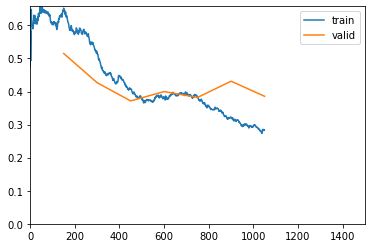

Better model found at epoch 0 with accuracy value: 0.8105530738830566.
Better model found at epoch 1 with accuracy value: 0.8321678042411804.
Epoch 3: reducing lr to 0.00019009692640269477
Epoch 4: reducing lr to 0.00016234913078995265
Epoch 5: reducing lr to 0.00012225240438725786
Epoch 6: early stopping
Epoch 6: reducing lr to 7.774839561274217e-05


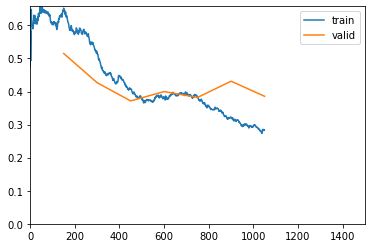

In [29]:
#training model the with all the layer's and saving the best one, and displaying the loss during training
learn_img.fit_one_cycle(10, slice(1e-4, 1e-3),
                        callbacks=[SaveModelCallback(learn_img,every='improvement', monitor='accuracy', name='best')])

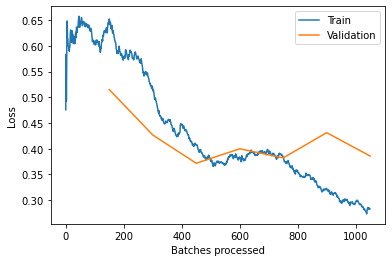

In [30]:
learn_img.recorder.plot_losses()

In [31]:
interp = ClassificationInterpretation.from_learner(learn_img)

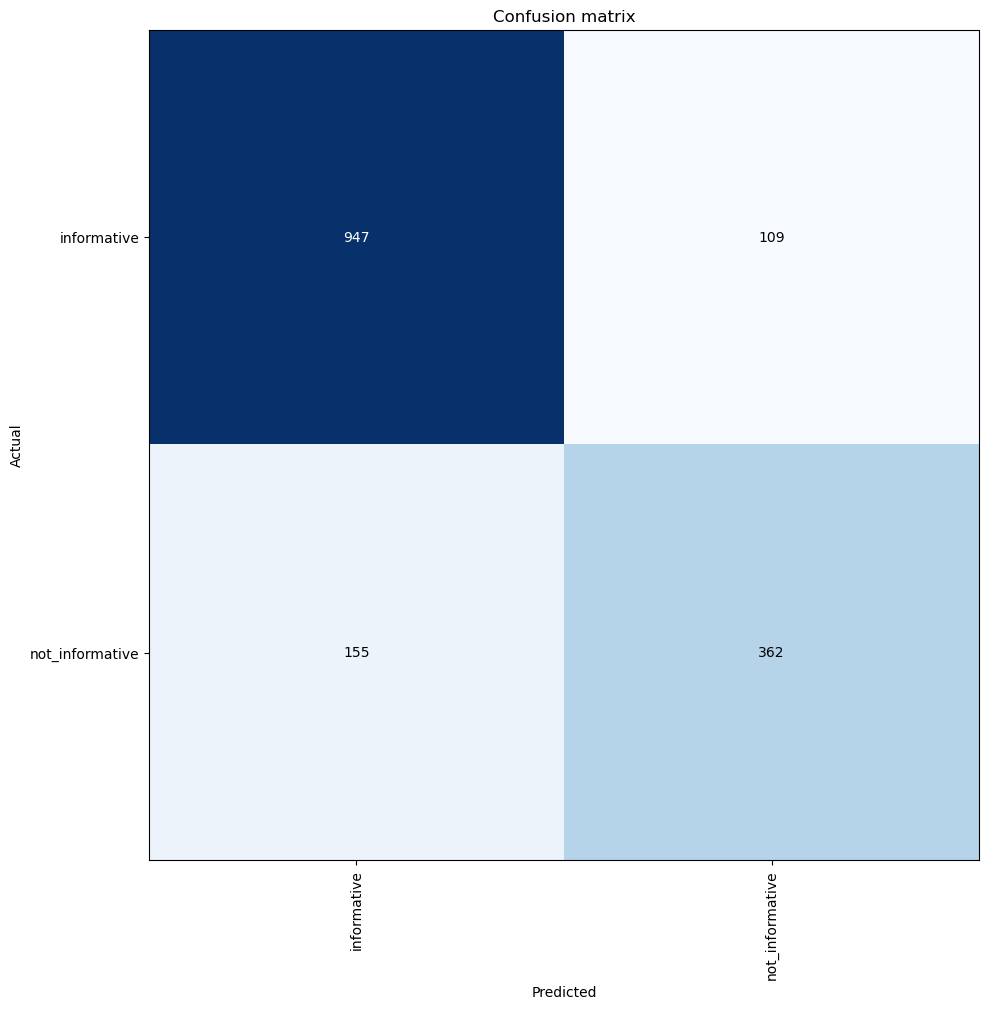

In [32]:
# plotting confusion matrix
interp.plot_confusion_matrix(figsize=(10,10), dpi=100)

In [33]:
#making on validation set to use it classification report
preds,y,losses = learn_img.get_preds(ds_type=DatasetType.Valid,with_loss=True)

y_preds = preds.argmax(1)

In [34]:
target_names = ['Informative', 'Non-Informative']

print(classification_report(y, y_preds, target_names=target_names))

                 precision    recall  f1-score   support

    Informative       0.86      0.90      0.88      1056
Non-Informative       0.77      0.70      0.73       517

       accuracy                           0.83      1573
      macro avg       0.81      0.80      0.81      1573
   weighted avg       0.83      0.83      0.83      1573



In [35]:
learn_img.validate(test_data_img.valid_dl,metrics=[accuracy,Precision(average='macro'),Precision(average='weighted'),
                                                 Recall(average='macro'),Recall(average='weighted'),
                                                 FBeta(average='macro',beta=1.),FBeta(average='weighted',beta=1.)])

[0.5436396,
 tensor(0.8233),
 tensor(0.8004),
 tensor(0.8224),
 tensor(0.7970),
 tensor(0.8233),
 tensor(0.7987),
 tensor(0.8228)]

In [37]:
#making on test set to use it classification report
preds,y,losses = learn_img.get_preds(ds_type=DatasetType.Test,with_loss=True)
y_preds = preds.argmax(1)
y = [test_data_img.valid_ds[i][1].data for i in range(len(test_data_img.valid_ds))]
print(classification_report(y, y_preds, target_names=target_names))

                 precision    recall  f1-score   support

    Informative       0.86      0.87      0.87      1030
Non-Informative       0.74      0.72      0.73       504

       accuracy                           0.82      1534
      macro avg       0.80      0.80      0.80      1534
   weighted avg       0.82      0.82      0.82      1534

